## comparing llm output to ground truth story (also generated by llm)

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# read in data from json
folder = "json/color/"

with open(folder + 'story_outline.json') as f:
    og_data = json.load(f)

In [16]:
with open(folder + 'final_data.json') as f:
    new_data = json.load(f)

In [17]:
# set up variables
og_scenes = og_data['scenes']
og_characters = og_data['characters']
og_locations = og_data['locations']
og_chapters = og_data['chapters']

new_scenes = new_data['scenes']
new_characters = new_data['characters']
new_locations = new_data['locations']
new_chapters = new_data['chapters']

In [18]:
# overall stats
print("Overall Stats")
print("Original Scenes: ", len(og_scenes))
print("New Scenes: ", len(new_scenes))
print()
print("Original Characters: ", len(og_characters))
print("New Characters: ", len(new_characters))
print()
print("Original Locations: ", len(og_locations))
print("New Locations: ", len(new_locations))

Overall Stats
Original Scenes:  48
New Scenes:  66

Original Characters:  18
New Characters:  13

Original Locations:  12
New Locations:  15


In [19]:
# chapter comparison
df = pd.DataFrame()

scenes_per_chap_og = []
scenes_per_chap_new = []
importance_og = []
importance_new = []
conflict_og = []
conflict_new = []
num_locations_og = []
num_locations_new = []
num_characters_og = []
num_characters_new = []

for i, chap in enumerate(og_chapters):
    scenes_per_chap_og.append(chap['scenes']) 
    scenes_per_chap_new.append(new_chapters[i]['scenes'])
    importance_og.append(chap['importance'])
    importance_new.append(new_chapters[i]['importance'])
    conflict_og.append(chap['conflict'])
    conflict_new.append(new_chapters[i]['conflict'])
    num_locations_og.append(len(chap['locations']))
    num_locations_new.append(len(new_chapters[i]['locations']))
    num_characters_og.append(len(chap['characters']))
    num_characters_new.append(len(new_chapters[i]['characters']))

# each row is a chapter
df['Chapter'] = range(1, len(og_chapters) + 1)
df['num_scenes_og'] = scenes_per_chap_og
df['num_scenes_new'] = scenes_per_chap_new
df['importance_og'] = importance_og
df['importance_new'] = importance_new
df['conflict_og'] = conflict_og
df['conflict_new'] = conflict_new
df['num_locations_og'] = num_locations_og
df['num_locations_new'] = num_locations_new
df['num_characters_og'] = num_characters_og
df['num_characters_new'] = num_characters_new

df.head()

,Chapter,num_scenes_og,num_scenes_new,importance_og,importance_new,conflict_og,conflict_new,num_locations_og,num_locations_new,num_characters_og,num_characters_new
0,1,5,8,0.9,0.81,0.3,0.62,4,3,1,1
1,2,1,5,0.8,0.80,0.4,0.52,1,3,2,2
2,3,4,6,0.9,0.85,0.5,0.32,2,2,2,2
3,4,3,7,0.9,0.87,0.6,0.36,1,1,6,6
4,5,5,5,1.0,0.96,0.8,0.94,1,3,3,3


In [20]:
# compute differences
df['diff_scenes'] = df['num_scenes_new'] - df['num_scenes_og'] 
df['diff_importance'] = df['importance_new'] - df['importance_og']
df['diff_conflict'] = df['conflict_new'] - df['conflict_og']
df['diff_locations'] = df['num_locations_new'] - df['num_locations_og']
df['diff_characters'] = df['num_characters_new'] - df['num_characters_og']

df

,Chapter,num_scenes_og,num_scenes_new,importance_og,importance_new,conflict_og,conflict_new,num_locations_og,num_locations_new,num_characters_og,num_characters_new,diff_scenes,diff_importance,diff_conflict,diff_locations,diff_characters
0,1,5,8,0.9,0.81,0.3,0.62,4,3,1,1,3,-0.09,0.32,-1,0
1,2,1,5,0.8,0.80,0.4,0.52,1,3,2,2,4,0.00,0.12,2,0
2,3,4,6,0.9,0.85,0.5,0.32,2,2,2,2,2,-0.05,-0.18,0,0
3,4,3,7,0.9,0.87,0.6,0.36,1,1,6,6,4,-0.03,-0.24,0,0
4,5,5,5,1.0,0.96,0.8,0.94,1,3,3,3,0,-0.04,0.14,2,0
5,6,1,6,0.9,0.80,0.7,0.55,1,2,4,3,5,-0.10,-0.15,1,-1
6,7,8,6,1.0,0.98,0.9,0.97,2,2,5,4,-2,-0.02,0.07,0,-1
7,8,4,4,0.9,0.95,0.6,0.62,1,2,4,5,0,0.05,0.02,1,1
8,9,1,1,0.8,1.00,0.9,1.00,1,1,3,3,0,0.20,0.10,0,0
9,10,7,6,1.0,0.98,1.0,0.80,3,3,3,3,-1,-0.02,-0.20,0,0


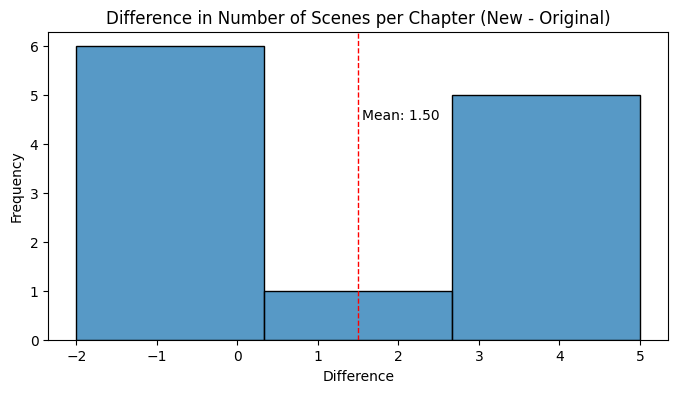

In [21]:
# plot histogram of diff_scenes
# make the plot aesthetic
# and show the mean

plt.figure(figsize=(8, 4))
sns.histplot(df['diff_scenes'], bins=3)
plt.axvline(df['diff_scenes'].mean(), color='red', linestyle='dashed', linewidth=1)
# add label for mean
plt.text(df['diff_scenes'].mean() + 0.05, 4.5, 'Mean: {:.2f}'.format(df['diff_scenes'].mean()))
plt.title("Difference in Number of Scenes per Chapter (New - Original)")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.show()

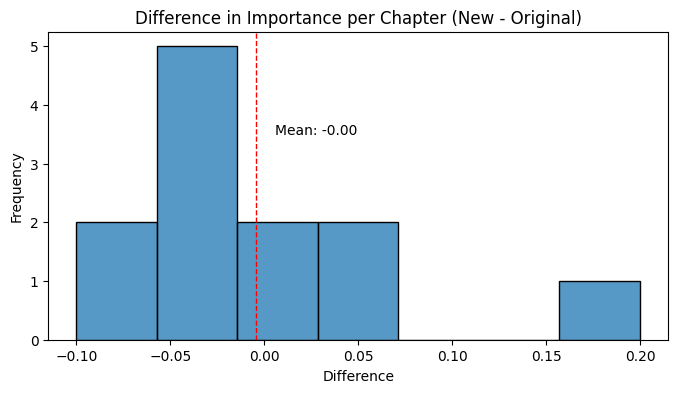

In [22]:
# plot histogram of diff_importance
plt.figure(figsize=(8, 4))
sns.histplot(df['diff_importance'])
plt.axvline(df['diff_importance'].mean(), color='red', linestyle='dashed', linewidth=1)
# add label for mean
plt.text(df['diff_importance'].mean() + 0.01, 3.5, 'Mean: {:.2f}'.format(df['diff_importance'].mean()))
plt.title("Difference in Importance per Chapter (New - Original)")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.show()

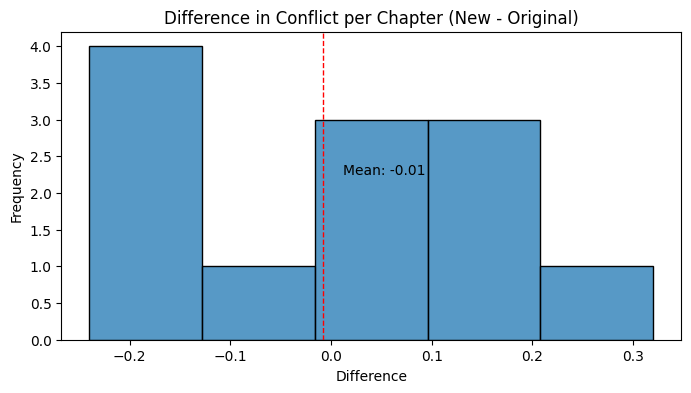

In [23]:
# plot histogram of diff_conflict
plt.figure(figsize=(8, 4))
sns.histplot(df['diff_conflict'])
plt.axvline(df['diff_conflict'].mean(), color='red', linestyle='dashed', linewidth=1)
# add label for mean
plt.text(df['diff_conflict'].mean() + 0.02, 2.25, 'Mean: {:.2f}'.format(df['diff_conflict'].mean()))
plt.title("Difference in Conflict per Chapter (New - Original)")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.show()

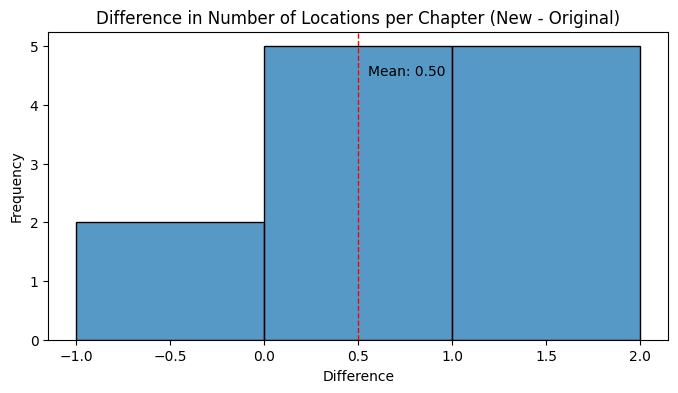

In [24]:
# plot histogram of diff_locations
plt.figure(figsize=(8, 4))
sns.histplot(df['diff_locations'], bins=3)
plt.axvline(df['diff_locations'].mean(), color='red', linestyle='dashed', linewidth=1)
# add label for mean
plt.text(df['diff_locations'].mean() + 0.05, 4.5, 'Mean: {:.2f}'.format(df['diff_locations'].mean()))
plt.title("Difference in Number of Locations per Chapter (New - Original)")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.show()

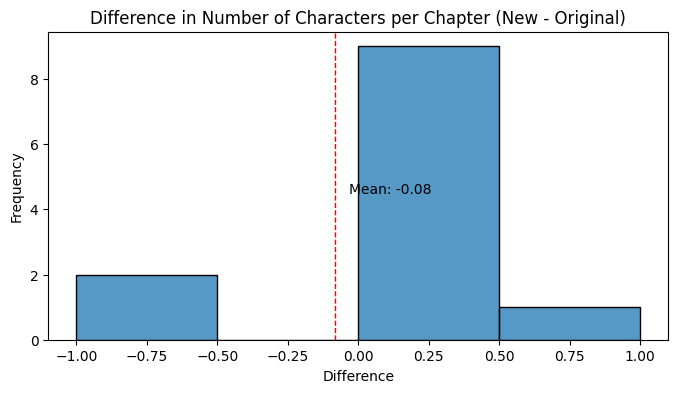

In [25]:
# plot histogram of diff_characters
plt.figure(figsize=(8, 4))
sns.histplot(df['diff_characters'], bins=4)
plt.axvline(df['diff_characters'].mean(), color='red', linestyle='dashed', linewidth=1)
# add label for mean
plt.text(df['diff_characters'].mean() + 0.05, 4.5, 'Mean: {:.2f}'.format(df['diff_characters'].mean()))
plt.title("Difference in Number of Characters per Chapter (New - Original)")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.show()

In [26]:
# collect num_lines for each scene
num_lines_og = []
num_lines_new = []

for scene in og_scenes:
    num_lines_og.append(scene['last_line'] - scene['first_line'] + 1)

for scene in new_scenes:
    num_lines_new.append(scene['num_lines'])

# plot both histograms on the same plot
plt.figure(figsize=(8, 4))
sns.histplot(num_lines_og, color='blue', binwidth=10, alpha=0.5, binrange=[0,120], label='Original')
# add mean line
plt.axvline(sum(num_lines_og) / len(num_lines_og), color='blue', linestyle='dashed', linewidth=1)
# add label for mean
plt.text(sum(num_lines_og) / len(num_lines_og) + 2, 14, 'Mean: {:.2f}'.format(sum(num_lines_og) / len(num_lines_og)))
sns.histplot(num_lines_new, color='red', binwidth=10, alpha=0.5, binrange=[0,120], label='New')
# add mean line
plt.axvline(sum(num_lines_new) / len(num_lines_new), color='red', linestyle='dashed', linewidth=1)
# add label for mean
plt.text(sum(num_lines_new) / len(num_lines_new) + 2, 12, 'Mean: {:.2f}'.format(sum(num_lines_new) / len(num_lines_new)))
plt.title("Number of Lines per Scene")
plt.xlabel("Number of Lines")
plt.ylabel("Frequency")
plt.legend()
plt.show()
    

KeyError: 'last_line'

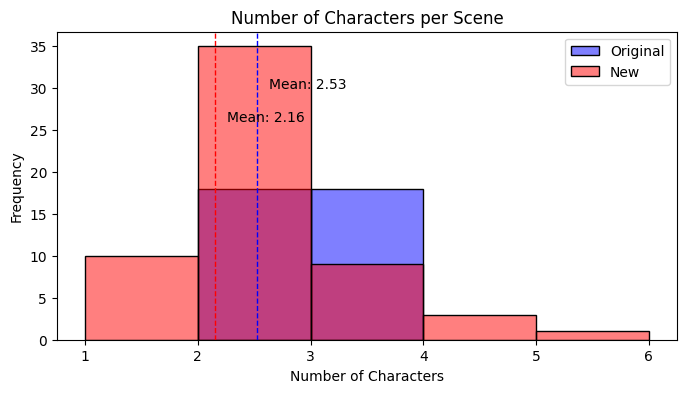

In [ ]:
# collect number of characters for each scene
num_characters_og = []
num_characters_new = []

for scene in og_scenes:
    num_characters_og.append(len(scene['characters']))

for scene in new_scenes:
    num_characters_new.append(len(scene['characters']))

# plot both histograms on the same plot
plt.figure(figsize=(8, 4))
sns.histplot(num_characters_og, color='blue', binwidth=1, alpha=0.5, label='Original')
# add mean line
plt.axvline(sum(num_characters_og) / len(num_characters_og), color='blue', linestyle='dashed', linewidth=1)
# add label for mean
plt.text(sum(num_characters_og) / len(num_characters_og) + 0.1, 30, 'Mean: {:.2f}'.format(sum(num_characters_og) / len(num_characters_og)))
sns.histplot(num_characters_new, color='red', binwidth=1, alpha=0.5, label='New')
# add mean line
plt.axvline(sum(num_characters_new) / len(num_characters_new), color='red', linestyle='dashed', linewidth=1)
# add label for mean
plt.text(sum(num_characters_new) / len(num_characters_new) + 0.1, 26, 'Mean: {:.2f}'.format(sum(num_characters_new) / len(num_characters_new)))
plt.title("Number of Characters per Scene")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.legend()
plt.show()